In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\kesha\Downloads\Dataset_ATS_v2.csv")
print(df.head())

   gender  SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
0  Female              0         No       1           No            No   
1    Male              0         No      41          Yes            No   
2  Female              0        Yes      52          Yes            No   
3  Female              0         No       1          Yes            No   
4    Male              0         No      67          Yes            No   

  InternetService        Contract  MonthlyCharges Churn  
0             DSL  Month-to-month              25   Yes  
1             DSL        One year              25    No  
2             DSL  Month-to-month              19    No  
3             DSL        One year              76   Yes  
4     Fiber optic  Month-to-month              51    No  


In [7]:
print(df.isnull().sum())

gender             0
SeniorCitizen      0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64


In [9]:
# Convert 'Churn' to binary (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# List of categorical columns to one-hot encode
categorical_columns = ['gender', 'InternetService', 'Contract', 'Dependents', 'PhoneService', 'MultipleLines']

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the preprocessed dataset
print(df.head())

   SeniorCitizen Dependents  tenure PhoneService MultipleLines  \
0              0         No       1           No            No   
1              0         No      41          Yes            No   
2              0        Yes      52          Yes            No   
3              0         No       1          Yes            No   
4              0         No      67          Yes            No   

   MonthlyCharges  Churn  gender_Male  InternetService_Fiber optic  \
0              25      1        False                        False   
1              25      0         True                        False   
2              19      0        False                        False   
3              76      1        False                        False   
4              51      0         True                         True   

   Contract_One year  Contract_Two year  
0              False              False  
1               True              False  
2              False              False  
3             

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

NameError: name 'df' is not defined

In [9]:
from sklearn.preprocessing import StandardScaler

# Ensure X_train and X_test contain only numeric columns
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])  
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])    

# Apply scaling to numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

print(X_train_scaled[:5])

NameError: name 'X_train' is not defined

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

NameError: name 'X_train_scaled' is not defined

In [5]:
optimal_clusters = 3  # Replace with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train_scaled)

# Assign clusters to the training data
X_train['Cluster'] = kmeans.labels_
print(X_train['Cluster'].value_counts())

NameError: name 'X_train_scaled' is not defined

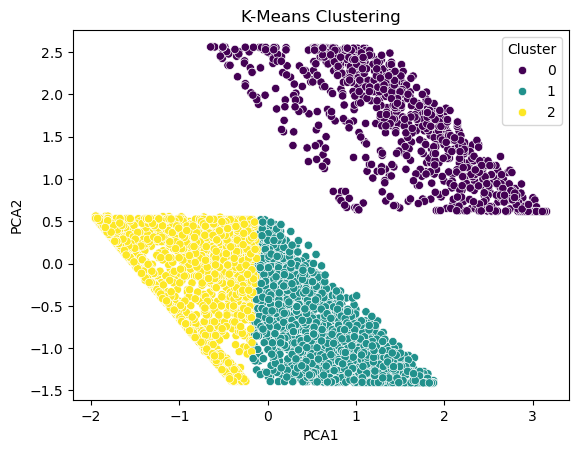

In [23]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Add cluster labels to the PCA-transformed data
X_train['PCA1'] = X_pca[:, 0]
X_train['PCA2'] = X_pca[:, 1]

# Plot the clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=X_train, palette='viridis')
plt.title('K-Means Clustering')
plt.show()